In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('train.csv')
df.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17316 entries, 0 to 17491
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17316 non-null  int64  
 1   title            17316 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17316 non-null  object 
 4   user_suggestion  17316 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 811.7+ KB


In [5]:
df.drop(columns=['review_id','year','title'],inplace=True)

In [6]:
df.head()

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1


In [7]:
df['user_suggestion'].value_counts()

1    9887
0    7429
Name: user_suggestion, dtype: int64

In [8]:
# missing values
df.isnull().sum()

user_review        0
user_suggestion    0
dtype: int64

In [9]:
df.duplicated().sum()

3

In [10]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(17313, 2)

In [13]:
df['user_suggestion'].value_counts()

1    9886
0    7427
Name: user_suggestion, dtype: int64

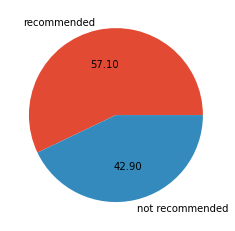

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['user_suggestion'].value_counts(), labels=['recommended','not recommended'],autopct="%0.2f")
plt.show()

In [15]:
import nltk
nltk.download('punkt')
df['num_characters'] = df['user_review'].apply(len)
df.head()

[nltk_data] Downloading package punkt to C:\Users\Danjin
[nltk_data]     master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,user_review,user_suggestion,num_characters
0,I'm scared and hearing creepy voices. So I'll...,1,710
1,"Best game, more better than Sam Pepper's YouTu...",1,335
2,"A littly iffy on the controls, but once you kn...",1,397
3,"Great game, fun and colorful and all that.A si...",1,280
4,Not many games have the cute tag right next to...,1,334


In [16]:
# num of words
df['num_words'] = df['user_review'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,user_review,user_suggestion,num_characters,num_words
0,I'm scared and hearing creepy voices. So I'll...,1,710,154
1,"Best game, more better than Sam Pepper's YouTu...",1,335,61
2,"A littly iffy on the controls, but once you kn...",1,397,84
3,"Great game, fun and colorful and all that.A si...",1,280,61
4,Not many games have the cute tag right next to...,1,334,72


In [17]:
df['num_sentences'] = df['user_review'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,user_review,user_suggestion,num_characters,num_words,num_sentences
0,I'm scared and hearing creepy voices. So I'll...,1,710,154,5
1,"Best game, more better than Sam Pepper's YouTu...",1,335,61,3
2,"A littly iffy on the controls, but once you kn...",1,397,84,5
3,"Great game, fun and colorful and all that.A si...",1,280,61,6
4,Not many games have the cute tag right next to...,1,334,72,4


In [18]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,17313.000000,17313.000000,17313.00000
mean,760.639115,156.615202,6.30584
std,901.561187,184.821142,7.72576
min,6.000000,1.000000,1.00000
25%,274.000000,57.000000,2.00000
50%,449.000000,93.000000,4.00000
75%,852.000000,176.000000,7.00000
max,8000.000000,2861.000000,196.00000


In [19]:
# not recommended
df[df['user_suggestion'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7427.000000,7427.000000,7427.000000
mean,800.724653,165.280059,6.558368
std,944.470198,194.079048,7.764420
min,6.000000,1.000000,1.000000
25%,285.000000,59.000000,2.000000
50%,473.000000,98.000000,4.000000
75%,891.000000,185.000000,8.000000
max,7989.000000,1711.000000,119.000000


In [20]:
#recommended
df[df['user_suggestion'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9886.000000,9886.000000,9886.000000
mean,730.524277,150.105604,6.116124
std,866.760529,177.280304,7.691528
min,6.000000,1.000000,1.000000
25%,267.000000,55.250000,2.000000
50%,434.000000,90.000000,4.000000
75%,820.000000,170.000000,7.000000
max,8000.000000,2861.000000,196.000000


In [21]:
df.head(10)

,user_review,user_suggestion,num_characters,num_words,num_sentences
0,I'm scared and hearing creepy voices. So I'll...,1,710,154,5
1,"Best game, more better than Sam Pepper's YouTu...",1,335,61,3
2,"A littly iffy on the controls, but once you kn...",1,397,84,5
3,"Great game, fun and colorful and all that.A si...",1,280,61,6
4,Not many games have the cute tag right next to...,1,334,72,4
5,"Early Access ReviewIt's pretty cute at first, ...",1,209,40,4
6,Great game. it's a cute little horror game tha...,1,198,46,4
7,Spooky's Jump Scare Mansion is a Free Retro ma...,1,917,123,7
8,"Somewhere between light hearted, happy parody ...",0,5217,1052,46
9,This game with its cute little out of the wall...,1,304,71,2


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

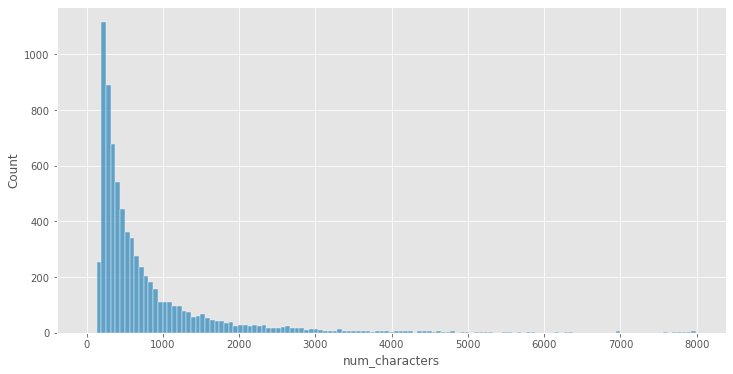

In [22]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['user_suggestion'] == 0]['num_characters'])

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

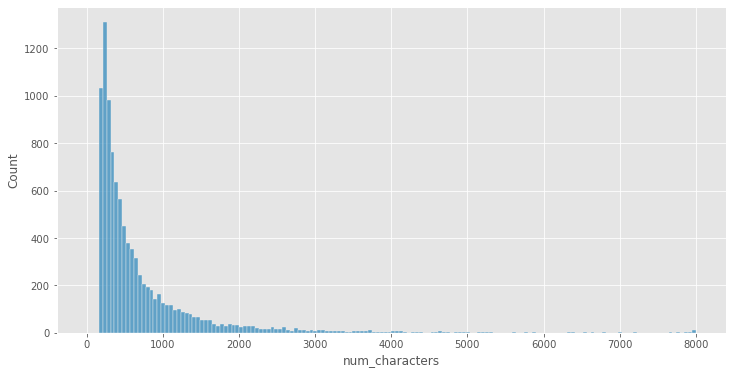

In [23]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['user_suggestion'] == 1]['num_characters'])

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

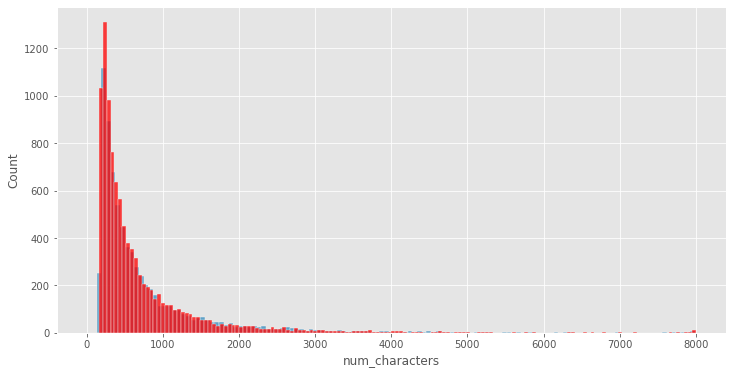

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['user_suggestion'] == 0]['num_characters'])
sns.histplot(df[df['user_suggestion'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

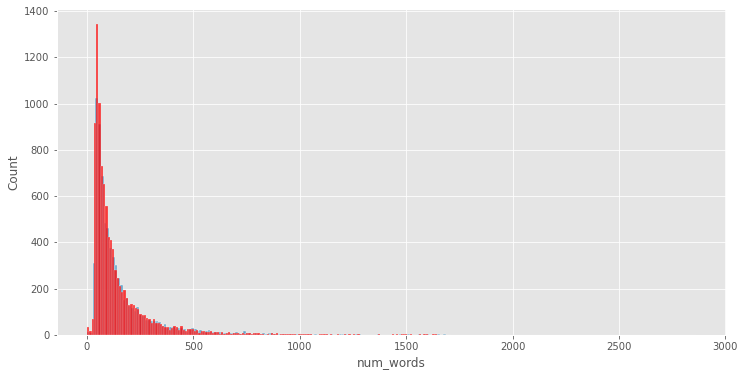

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['user_suggestion'] == 0]['num_words'])
sns.histplot(df[df['user_suggestion'] == 1]['num_words'],color='red')

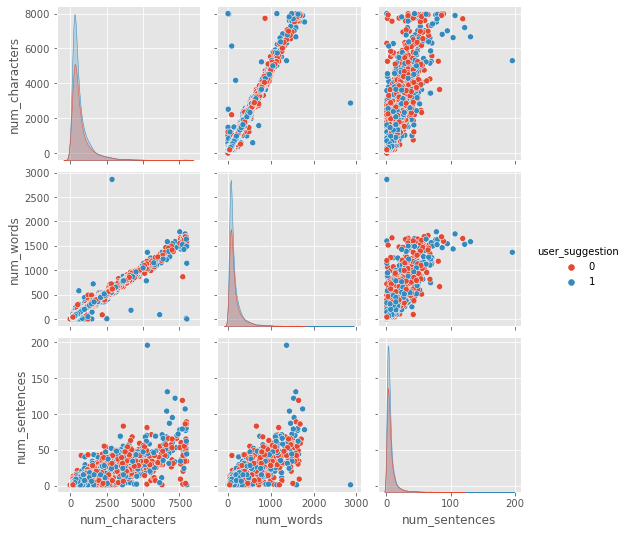

In [26]:
sns.pairplot(df,hue='user_suggestion')

<AxesSubplot:>

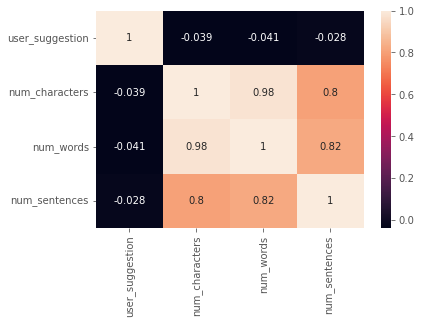

In [27]:
sns.heatmap(df.corr(),annot=True)

In [48]:
# Data Preprocessing
# Lower case, Tokenization, Removing special characters, Removing stop words and punctuation, Stemming
from nltk.corpus import stopwords
nltk.download('stopwords')
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)   
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))   
    return " ".join(y)

[nltk_data] Downloading package stopwords to C:\Users\Danjin
[nltk_data]     master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
df['user_review'][10]

"Early Access ReviewI thought this game would be fun and cute. Never have I been so wrong.There's a room with a computer with 'Cat-Dos' operating system making the experience 705949% more chilling than it originally was.Play this game - not a very romantic idea."

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [51]:
df['transformed_text'] = df['user_review'].apply(transform_text)

In [52]:
df.head()

,user_review,user_suggestion,num_characters,num_words,num_sentences,transformed_text
0,I'm scared and hearing creepy voices. So I'll...,1,710,154,5,scare hear creepi voic paus moment write revie...
1,"Best game, more better than Sam Pepper's YouTu...",1,335,61,3,best game better sam pepper youtub account nee...
2,"A littly iffy on the controls, but once you kn...",1,397,84,5,littli iffi control know play easi master made...
3,"Great game, fun and colorful and all that.A si...",1,280,61,6,great game fun color side note though get wind...
4,Not many games have the cute tag right next to...,1,334,72,4,mani game cute tag right next horror tag first...


In [62]:
spam_corpus = []
for msg in df[df['user_suggestion'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\Danjin master\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


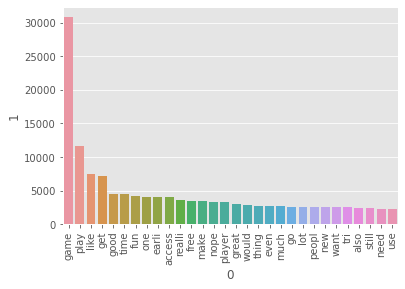

In [63]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Danjin master\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


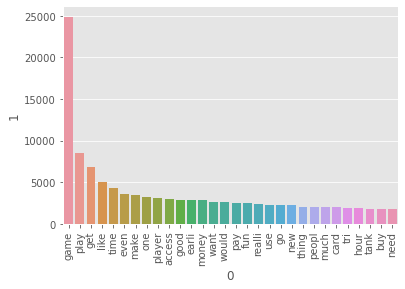

In [65]:
ham_corpus = []
for msg in df[df['user_suggestion'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
#Model Building

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [73]:
y = df['user_suggestion'].values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7585908172105111
[[1116  368]
 [ 468 1511]]
0.8041511442256519


In [79]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8206757146982385
[[1082  402]
 [ 219 1760]]
0.8140610545790934


In [80]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7877562806814901
[[ 993  491]
 [ 244 1735]]
0.7794249775381851


In [82]:
!pip install xgboost

  Using cached xgboost-1.5.2-py3-none-win_amd64.whl (106.6 MB)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}



In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8333814611608432, 0.8436274509803922)

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8333814611608432
Precision -  0.8436274509803922
For  KN
Accuracy -  0.5723361247473289
Precision -  0.5741512805241215
For  NB
Accuracy -  0.8206757146982385
Precision -  0.8140610545790934
For  DT
Accuracy -  0.6477043026277793
Precision -  0.634051571882727
For  LR
Accuracy -  0.8325151602656656
Precision -  0.8420537897310514
For  RF
Accuracy -  0.809702570025989
Precision -  0.8179190751445087
For  AdaBoost
Accuracy -  0.7686976609875831
Precision -  0.7696886446886447
For  BgC
Accuracy -  0.7750505342188854
Precision -  0.7892960462873674
For  ETC
Accuracy -  0.8206757146982385
Precision -  0.8283365570599613
For  GBDT
Accuracy -  0.7366445278660121
Precision -  0.7106198183971575


C:\Users\Danjin master\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.811146404851285
Precision -  0.806287563569117


In [95]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending= False)

In [96]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.833381,0.843627
4,LR,0.832515,0.842054
8,ETC,0.820676,0.828337
5,RF,0.809703,0.817919
2,NB,0.820676,0.814061
10,xgb,0.811146,0.806288
7,BgC,0.775051,0.789296
6,AdaBoost,0.768698,0.769689
9,GBDT,0.736645,0.710620
3,DT,0.647704,0.634052


In [98]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.833381
1,LR,Accuracy,0.832515
2,ETC,Accuracy,0.820676
3,RF,Accuracy,0.809703
4,NB,Accuracy,0.820676
5,xgb,Accuracy,0.811146
6,BgC,Accuracy,0.775051
7,AdaBoost,Accuracy,0.768698
8,GBDT,Accuracy,0.736645
9,DT,Accuracy,0.647704


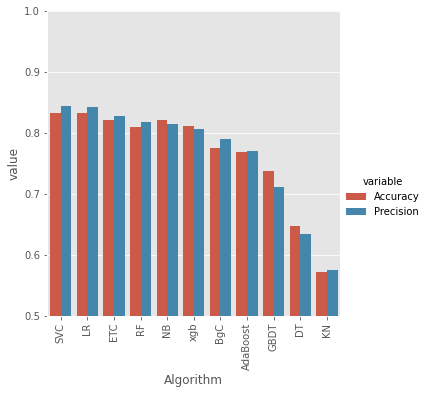

In [99]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.833381,0.843627,0.833381,0.843627,0.833381,0.843627,0.833381,0.843627
1,LR,0.832515,0.842054,0.832515,0.842054,0.832515,0.842054,0.832515,0.842054
2,ETC,0.820676,0.828337,0.820676,0.828337,0.820676,0.828337,0.820676,0.828337
3,RF,0.809703,0.817919,0.809703,0.817919,0.809703,0.817919,0.809703,0.817919
4,NB,0.820676,0.814061,0.820676,0.814061,0.820676,0.814061,0.820676,0.814061
5,xgb,0.811146,0.806288,0.811146,0.806288,0.811146,0.806288,0.811146,0.806288
6,BgC,0.775051,0.789296,0.775051,0.789296,0.775051,0.789296,0.775051,0.789296
7,AdaBoost,0.768698,0.769689,0.768698,0.769689,0.768698,0.769689,0.768698,0.769689
8,GBDT,0.736645,0.710620,0.736645,0.710620,0.736645,0.710620,0.736645,0.710620
9,DT,0.647704,0.634052,0.647704,0.634052,0.647704,0.634052,0.647704,0.634052


In [101]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8414669361825007
Precision 0.8404761904761905


In [104]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))